# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import better_tensorflow as btf

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([[1, 1], [2, 3], [3, 3]])
Y = np.array([1, -1, -1])

x_mlp = [
    [[1, 1]],
    [[2, 3], [3, 3]],
]

btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01, 1000)

print(btf.predict_mlp([1, 1], [], True, True))  # 0
print(btf.predict_mlp([2, 3], [], True, True))  # 1
print(btf.predict_mlp([3, 3], [], True, True))  # 1

0.0[[-0.9743958, -0.51020646], [0.99601656, 3.33786e-6]]

1.0
1.0
[[-0.99974066, 0.9945165], [0.00401757, 0.99665165]]
[[-0.99951756, 0.9983536], [-0.004334065, 0.9967029]]


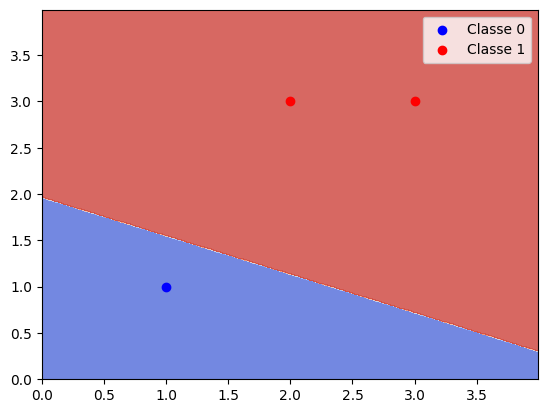

<Figure size 640x480 with 0 Axes>

In [3]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([btf.predict_mlp(point, [], True, False) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0, 0], X[0, 1], color="blue", label="Classe 0")
plt.scatter(X[1:3, 0], X[1:3, 1], color="red", label="Classe 1")
plt.legend()
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.concatenate(
    [
        np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
        np.random.random((50, 2)) * 0.9 + np.array([2, 2]),
    ]
)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

x_mlp = [[X[0:50, 0], X[0:50, 1]], [X[50:100, 0], X[50:100, 1]]]

x_mlp = [[], []]

for i in range(50):
    x_mlp[0].append([X[i, 0], X[i, 1]])
for i in range(50):
    x_mlp[1].append([X[i + 50, 0], X[i + 50, 1]])

btf.train_mlp(x_mlp, [], [], 1_000_000, [2], "", True, False, False, 0.01, 1000)

result = 0
index = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_mlp(x, [], True, False) == i:
            result += 1
        index += 1

In [5]:
print(result * 100 / index)

100.0


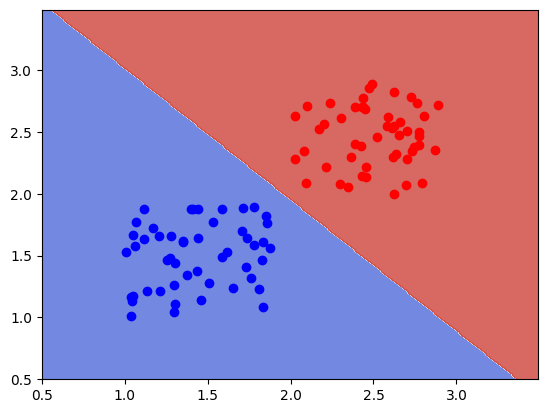

<Figure size 640x480 with 0 Axes>

In [6]:
xx, yy = np.meshgrid(np.arange(0.5, 3.5, 0.01), np.arange(0.5, 3.5, 0.01))
Z = np.array(
    [btf.predict_mlp([x, y], [], True, False) for x, y in zip(xx.ravel(), yy.ravel())]
)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0:50, 0], X[0:50, 1], color="blue")
plt.scatter(X[50:100, 0], X[50:100, 1], color="red")
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [7]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

x_mlp = [[[0, 0], [1, 1]], [[1, 0], [0, 1]]]

btf.train_mlp(x_mlp, [], [], 1_000_000, [4], "", True, False, False, 0.01, 10000)

print(btf.predict_mlp([1, 1], [], True, True))  # 0
print(btf.predict_mlp([0, 0], [], True, True))  # 0
print(btf.predict_mlp([1, 0], [], True, True))  # 1
print(btf.predict_mlp([0, 1], [], True, True))  # 1

0.0
0.0
1.0
1.0
[[-0.87169516, -0.86832446, 0.91129595, 0.3545593], [0.99623525, 4.6253204e-5]]
[[-0.8066508, -0.7987185, -0.1228167, 0.7577305], [0.99580675, 2.2649765e-5]]
[[0.78562707, -0.9980765, 0.41929868, 0.6894608], [2.2768974e-5, 0.99457675]]
[[-0.99824005, 0.7824273, 0.7464258, 0.47351032], [2.3290515e-5, 0.9945185]]


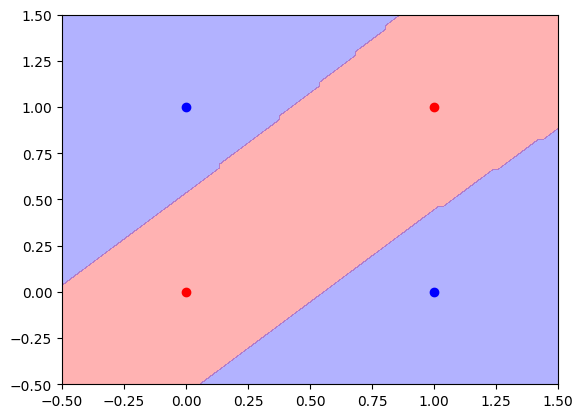

In [8]:
plt.scatter(X[0:2, 0], X[0:2, 1], color="blue")
plt.scatter(X[2:4, 0], X[2:4, 1], color="red")

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_mlp(point, [], True, False) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(
    xx, yy, predictions, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=["red", "blue"]
)
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [9]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])


x_mlp = [[], []]
for i in range(500):
    index = 0 if Y[i] == 1 else 1
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_mlp(
    x_mlp, [], [], 1_000_000, [10, 4], "", True, False, False, 0.01, 1_000_000
)

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_mlp(x, [], True, False) == i:
            result += 1
        index += 1

In [10]:
print(result * 100 / index)

99.00199600798403


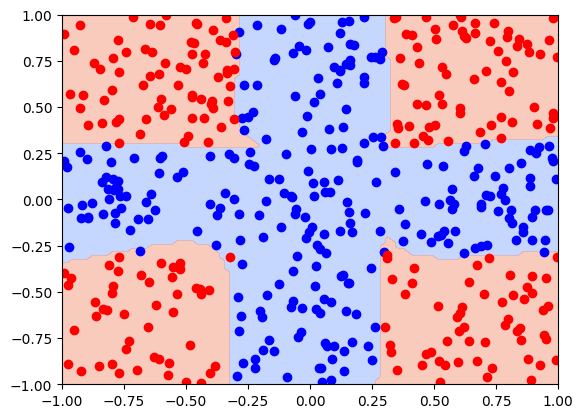

<Figure size 640x480 with 0 Axes>

In [11]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_mlp(point, [], True, False) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(
    xx, yy, predictions, alpha=0.5, levels=np.arange(-0.5, 2, 1), cmap="coolwarm"
)

plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X))))
    )[:, 1],
    color="blue",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X))))
    )[:, 1],
    color="red",
)

plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [12]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array(
    [
        (
            [1, 0, 0]
            if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0
            else (
                [0, 1, 0]
                if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0
                else (
                    [0, 0, 1]
                    if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0
                    else [0, 0, 0]
                )
            )
        )
        for p in X
    ]
)

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

x_mlp = [[], [], []]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_mlp(x_mlp, [], [], 1_000_000, [4], "", True, False, False, 0.01, 1000)

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_mlp(x, [], True, False) == i:
            result += 1
        index += 1

In [13]:
print(result * 100 / index)

99.35275080906149


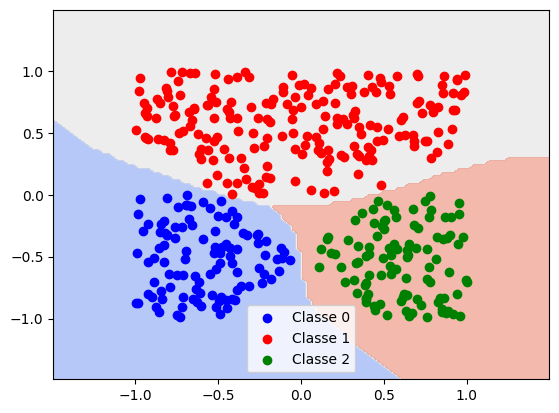

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Création d'une grille de points sur le plan
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100),
)

# Prédiction du modèle pour chaque point de la grille
Z = np.array(
    [btf.predict_mlp([x, y], [], True, False) for x, y in zip(xx.ravel(), yy.ravel())]
)
Z = Z.reshape(xx.shape)

# Affichage des frontières de décision
plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(-0.5, 3, 1), cmap="coolwarm")


# Fonction utilitaire pour afficher les points d'une classe
def scatter_class(class_index, color):
    points = np.array([X[i] for i in range(len(X)) if Y[i][class_index] == 1])
    plt.scatter(points[:, 0], points[:, 1], color=color, label=f"Classe {class_index}")


# Affichage des points de chaque classe
scatter_class(0, "blue")
scatter_class(1, "red")
scatter_class(2, "green")

plt.legend()
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [15]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array(
    [
        (
            [1, 0, 0]
            if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25
            else (
                [0, 1, 0]
                if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25
                else [0, 0, 1]
            )
        )
        for p in X
    ]
)


x_mlp = [[], [], []]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_mlp(x_mlp, [], [], 1_000_000, [64, 64], "", True, False, False, 0.01, 10000)

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_mlp(x, [], True, False) == i:
            result += 1
        index += 1

In [16]:
print(result * 100 / index)

95.19832985386222


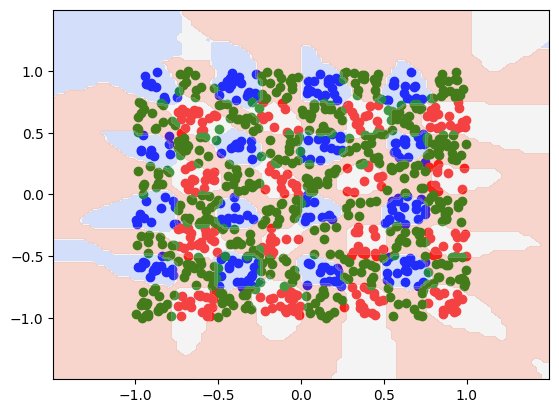

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 1],
    color="blue",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 1],
    color="red",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 1],
    color="green",
)

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100),
)
Z = np.array(
    [btf.predict_mlp([x, y], [], True, False) for x, y in zip(xx.ravel(), yy.ravel())]
)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap="coolwarm")
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [18]:
X = np.array([[1], [2]])
Y = np.array([2, 3])

x_mlp = [[[1]], [[2]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [], "", False, False, False, 0.01, 10000)

print(btf.predict_mlp([1], [], False, True))  # 2
print(btf.predict_mlp([2], [], False, True))  # 3

1.9999948740005493
2.00000262260437
[[1.9999949]]
[[2.0000026]]


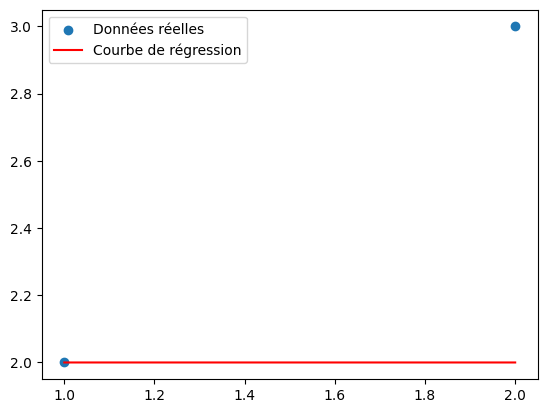

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(X, Y, label="Données réelles")
X_sorted = np.sort(X, axis=0)
Y_pred = np.array([btf.predict_mlp(x, [], False, False) for x in [[1], [2]]])
plt.plot(X_sorted, Y_pred, color="red", label="Courbe de régression")
plt.legend()
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [20]:
X = np.array([[1], [2], [3]])
Y = np.array([2, 3, 2.5])

x_mlp = [[[1]], [[2]], [[3]]]

btf.train_mlp(
    x_mlp, [], [2, 3, 2.5], 1_000_000, [1, 3], "", False, False, False, 0.01, 10000
)

print(btf.predict_mlp([1], [], False, True))
print(btf.predict_mlp([2], [], False, True))
print(btf.predict_mlp([3], [], False, True))

2.000000238418579
2.0
2.0
[[0.7996675], [-0.77059066, -0.8156679, 0.82930744], [2.0000002]]
[[0.7996663], [-0.7705906, -0.81566775, 0.8293073], [2.0]]
[[0.7996651], [-0.7705905, -0.81566757, 0.8293072], [2.0]]


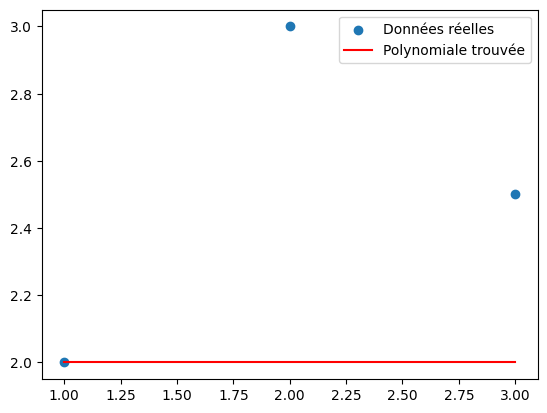

<Figure size 640x480 with 0 Axes>

In [21]:
plt.scatter(X, Y, label="Données réelles")
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred_smooth = np.array([btf.predict_mlp(x, [], False, False) for x in X_smooth])
plt.plot(X_smooth, Y_pred_smooth, color="red", label="Polynomiale trouvée")
plt.legend()
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [22]:
X = np.array([[1, 1], [2, 2], [3, 1]])
Y = np.array([2, 3, 2.5])

x_mlp = [[[1, 1]], [[2, 2]], [[3, 1]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2], "", False, False, False, 0.01, 10000)

print(btf.predict_mlp([1, 1], [], False, True))
print(btf.predict_mlp([2, 2], [], False, True))
print(btf.predict_mlp([3, 1], [], False, True))

1.9960746765136719
2.0014760494232178
2.001487970352173
[[-0.9933114, -0.99674344], [1.9960747]]
[[-0.99987227, -0.9999865], [2.001476]]
[[-0.99987715, -0.9999962], [2.001488]]


In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [24]:
X = np.array([[1, 1], [2, 2], [3, 3]])
Y = np.array([1, 2, 3])

x_mlp = [[[1, 1]], [[2, 2]], [[3, 3]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2], "", False, False, False, 0.01, 10000)

print(btf.predict_mlp([1], [], False, True))
print(btf.predict_mlp([2], [], False, True))
print(btf.predict_mlp([3], [], False, True))

0.9187315702438354
0.9927475452423096
0.9988211393356323
[[-0.85284114, 0.9230504], [0.9187316]]
[[-0.9686136, 0.99109626], [0.99274755]]
[[-0.9936195, 0.999001], [0.99882114]]


In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [26]:
X = np.array(
    [
        [1, 0],
        [0, 1],
        [1, 1],
        [0, 0],
    ]
)
Y = np.array([2, 1, -2, -1])

x_mlp = [[[1, 0]], [[0, 1]], [[1, 1]], [[0, 0]]]

btf.train_mlp(x_mlp, [], Y, 1_000_000, [2, 2], "", False, False, False, 0.01, 10000)

print(btf.predict_mlp([1, 0], [], False, True))
print(btf.predict_mlp([0, 1], [], False, True))
print(btf.predict_mlp([1, 1], [], False, True))
print(btf.predict_mlp([0, 0], [], False, True))

2.0011560916900635
2.001345634460449
1.9987602233886719
1.9986183643341064
[[-0.73616993, -0.8560385], [-0.9449973, 0.8023373], [2.001156]]
[[-0.7940066, -0.6829183], [-0.9353089, 0.8275267], [2.0013456]]
[[-0.7126298, -0.890377], [-0.9454849, 0.7935355], [1.9987602]]
[[-0.81161404, -0.5974341], [-0.92844665, 0.8363342], [1.9986184]]


In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>